# Import Dataset and Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import string # special operations on strings
import spacy # language models
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy.cli
spacy.cli.download("en_core_web_md")
import nltk
from nltk.tokenize import word_tokenize
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
UsageError: unrecognized arguments: # Plots show up in notebook


In [2]:
reviews = pd.read_csv("Product_details.csv")
reviews['Product_Description'] = reviews['Product_Description'].str.lower()
reviews

Text_ID                                Product_Description  \
0        3057  the web designerûªs guide to ios (and android...   
1        6254  rt @mention line for ipad 2 is longer today th...   
2        8212  crazy that apple is opening a temporary store ...   
3        4422  the lesson from google one pass: in this digit...   
4        5526  rt @mention at the panel: &quot;your mom has a...   
...       ...                                                ...   
6359     2945  thanks @mention for hosting this event #sxsw #...   
6360     4528  sxsw iphone app is awesome, but ipad app crash...   
6361     6526  rt @mention rt @mention download 20+ free trac...   
6362     2110  oh at texas social media awards: 'you don't ne...   
6363     2177  #google launching a &quot;major&quot; new soci...   

      Product_Type  Sentiment  
0                9          2  
1                9          2  
2                9          2  
3                9          2  
4                9          2  
...            ...        ...  
6359             9          2  
6360             7          1  
6361             9          2  
6362             9          2  
6363             9          2  

[6364 rows x 4 columns]

In [3]:
reviews1 = reviews['Product_Description']
reviews1 = reviews1.astype(str)
reviews1 = reviews1[reviews1.str.contains('nan')==False]
reviews1

0       the web designerûªs guide to ios (and android...
1       rt @mention line for ipad 2 is longer today th...
2       crazy that apple is opening a temporary store ...
3       the lesson from google one pass: in this digit...
4       rt @mention at the panel: &quot;your mom has a...
                              ...                        
6359    thanks @mention for hosting this event #sxsw #...
6360    sxsw iphone app is awesome, but ipad app crash...
6361    rt @mention rt @mention download 20+ free trac...
6362    oh at texas social media awards: 'you don't ne...
6363    #google launching a &quot;major&quot; new soci...
Name: Product_Description, Length: 6350, dtype: object

In [4]:
reviews1.describe()

count                                         6350
unique                                        6324
top       win free ipad 2 from webdoc.com #sxsw rt
freq                                             4
Name: Product_Description, dtype: object

In [5]:
reviews = reviews.drop_duplicates(subset="Product_Description",keep=False)
reviews

Text_ID                                Product_Description  \
0        3057  the web designerûªs guide to ios (and android...   
1        6254  rt @mention line for ipad 2 is longer today th...   
2        8212  crazy that apple is opening a temporary store ...   
3        4422  the lesson from google one pass: in this digit...   
4        5526  rt @mention at the panel: &quot;your mom has a...   
...       ...                                                ...   
6359     2945  thanks @mention for hosting this event #sxsw #...   
6360     4528  sxsw iphone app is awesome, but ipad app crash...   
6361     6526  rt @mention rt @mention download 20+ free trac...   
6362     2110  oh at texas social media awards: 'you don't ne...   
6363     2177  #google launching a &quot;major&quot; new soci...   

      Product_Type  Sentiment  
0                9          2  
1                9          2  
2                9          2  
3                9          2  
4                9          2  
...            ...        ...  
6359             9          2  
6360             7          1  
6361             9          2  
6362             9          2  
6363             9          2  

[6320 rows x 4 columns]

In [6]:
reviews2 = [y.strip() for y in reviews.Product_Description]
reviews2 = [x for x in reviews2 if x]
text = ' '.join(reviews2)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'the web designer\x89ûªs guide to ios and android apps today mention 10 am link sxsw rt mention line for ipad 2 is longer today than yesterday sxsw   are you getting in line again today just for fun crazy that apple is opening a temporary store in austin tomorrow to handle the rabid sxsw eye pad too seekers the lesson from google one pass in this digital environment users want to purchase across every platform with one tool sxsw elonsxsw rt mention at the panel quotyour mom has an ipad designing for boomersquot sxsw rt mention i think my effing hubby is in line for an ipad 2 can someone point him towards the lineup for wife number 2 sxswi sxsw quotandroid users are not iphone users they use the options menu and contextual menuquot mention sxsw wow rtmention we interrupt your regularly scheduled sxsw geek programming with big news link  google circles google to launch new social network called circles possibly today link link sxsw in mention  welcome enjoy sxsw and ride anywhere in aust

In [7]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(["mention","sxsw","SXSW","RT","link","Austin","amp","via","be","4","sxswi","re","if","3","5","a","u","SxSW","s","re","m","SXSWi","\x89ÛÏmention","pm","fb","ll","sxsw\x89Û\x9d","2","qagb","Sxsw","\x89ûïmention","I"])

reviews = [word for word in no_punc_text if not word in stop_words]
reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['h',
 'e',
 ' ',
 'w',
 'e',
 'b',
 ' ',
 'e',
 'g',
 'n',
 'e',
 'r',
 '\x89',
 'û',
 'ª',
 ' ',
 'g',
 'e',
 ' ',
 ' ',
 ' ',
 'n',
 ' ',
 'n',
 'r',
 ' ',
 'p',
 'p',
 ' ',
 ' ',
 'e',
 'n',
 'n',
 ' ',
 '1',
 '0',
 ' ',
 ' ',
 'l',
 'n',
 'k',
 ' ',
 'x',
 'w',
 ' ',
 'r',
 ' ',
 'e',
 'n',
 'n',
 ' ',
 'l',
 'n',
 'e',
 ' ',
 'f',
 'r',
 ' ',
 'p',
 ' ',
 ' ',
 ' ',
 'l',
 'n',
 'g',
 'e',
 'r',
 ' ',
 ' ',
 'h',
 'n',
 ' ',
 'e',
 'e',
 'r',
 ' ',
 'x',
 'w',
 ' ',
 ' ',
 ' ',
 'r',
 'e',
 ' ',
 ' ',
 'g',
 'e',
 'n',
 'g',
 ' ',
 'n',
 ' ',
 'l',
 'n',
 'e',
 ' ',
 'g',
 'n',
 ' ',
 ' ',
 'j',
 ' ',
 'f',
 'r',
 ' ',
 'f',
 'n',
 ' ',
 'c',
 'r',
 'z',
 ' ',
 'h',
 ' ',
 'p',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'p',
 'e',
 'n',
 'n',
 'g',
 ' ',
 ' ',
 'e',
 'p',
 'r',
 'r',
 ' ',
 'r',
 'e',
 ' ',
 'n',
 ' ',
 'n',
 ' ',
 'r',
 'r',
 'w',
 ' ',
 ' ',
 'h',
 'n',
 'l',
 'e',
 ' ',
 'h',
 'e',
 ' ',
 'r',
 'b',
 ' ',
 'x',
 'w',
 ' ',
 'e',
 'e',
 ' ',
 'p',
 ' ',
 ' ',
 'e',
 'e',
 

In [8]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(60, 40))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off")

In [9]:
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(no_punc_text)
# Plot
plot_cloud(wordcloud)

In [10]:
reviews = pd.read_csv("Product_details.csv")
reviews['Product_Description'] = reviews['Product_Description'].str.lower()
reviews.head()

Text_ID                                Product_Description  Product_Type  \
0     3057  the web designerûªs guide to ios (and android...             9   
1     6254  rt @mention line for ipad 2 is longer today th...             9   
2     8212  crazy that apple is opening a temporary store ...             9   
3     4422  the lesson from google one pass: in this digit...             9   
4     5526  rt @mention at the panel: &quot;your mom has a...             9   

   Sentiment  
0          2  
1          2  
2          2  
3          2  
4          2

In [11]:
reviews.Product_Type.nunique()

10

In [12]:
reviews.Sentiment.value_counts()

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

In [13]:
df0 = reviews[reviews['Product_Type'] == 0]
df1 = reviews[reviews['Product_Type'] == 1]
df2 = reviews[reviews['Product_Type'] == 2]
df3 = reviews[reviews['Product_Type'] == 3]
df4 = reviews[reviews['Product_Type'] == 4]
df5 = reviews[reviews['Product_Type'] == 5]
df6 = reviews[reviews['Product_Type'] == 6]
df7 = reviews[reviews['Product_Type'] == 7]
df8 = reviews[reviews['Product_Type'] == 8]
df9 = reviews[reviews['Product_Type'] == 9]

In [14]:
temp = [y.strip() for y in df0.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df1.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df2.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df3.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df4.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df5.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df6.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df7.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df8.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df9.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

## Sentimental Analysis using Afinn(Standard file)

In [15]:
#Sentiment analysis
afinn = pd.read_csv('afinn.csv', encoding = 'latin1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [16]:
reviews.Product_Description

0       the web designerûªs guide to ios (and android...
1       rt @mention line for ipad 2 is longer today th...
2       crazy that apple is opening a temporary store ...
3       the lesson from google one pass: in this digit...
4       rt @mention at the panel: &quot;your mom has a...
                              ...                        
6359    thanks @mention for hosting this event #sxsw #...
6360    sxsw iphone app is awesome, but ipad app crash...
6361    rt @mention rt @mention download 20+ free trac...
6362    oh at texas social media awards: 'you don't ne...
6363    #google launching a &quot;major&quot; new soci...
Name: Product_Description, Length: 6364, dtype: object

In [17]:
sentences = reviews.Product_Description.tolist()

sentences

['the web designer\x89ûªs guide to ios (and android) apps, today @mention 10 a.m! {link} #sxsw',
 'rt @mention line for ipad 2 is longer today than yesterday. #sxsw  // are you getting in line again today just for fun?',
 'crazy that apple is opening a temporary store in austin tomorrow to handle the rabid #sxsw eye pad too seekers.',
 'the lesson from google one pass: in this digital environment, users want to purchase across every platform with one tool. #sxsw #elonsxsw',
 'rt @mention at the panel: &quot;your mom has an ipad, designing for boomers&quot; #sxsw',
 'rt @mention i think my effing hubby is in line for an #ipad 2. can someone point him towards the line-up for wife number #2. #sxswi #sxsw',
 '&quot;android users are not iphone users. (they use the options menu, and contextual menu)&quot; ~@mention #sxsw',
 'wow! rt@mention we interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles',
 'google to launch new social network called circl

In [18]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0     the web designerûªs guide to ios (and android...
1     rt @mention line for ipad 2 is longer today th...
2     crazy that apple is opening a temporary store ...
3     the lesson from google one pass: in this digit...
4     rt @mention at the panel: &quot;your mom has a...
...                                                 ...
6359  thanks @mention for hosting this event #sxsw #...
6360  sxsw iphone app is awesome, but ipad app crash...
6361  rt @mention rt @mention download 20+ free trac...
6362  oh at texas social media awards: 'you don't ne...
6363  #google launching a &quot;major&quot; new soci...

[6364 rows x 1 columns]

In [19]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [20]:
nlp = spacy.load('en_core_web_md')

In [21]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [22]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [23]:
sent_df

sentence  sentiment_value
0     the web designerûªs guide to ios (and android...                0
1     rt @mention line for ipad 2 is longer today th...                4
2     crazy that apple is opening a temporary store ...               -2
3     the lesson from google one pass: in this digit...                1
4     rt @mention at the panel: &quot;your mom has a...                0
...                                                 ...              ...
6359  thanks @mention for hosting this event #sxsw #...                2
6360  sxsw iphone app is awesome, but ipad app crash...                2
6361  rt @mention rt @mention download 20+ free trac...                1
6362  oh at texas social media awards: 'you don't ne...                3
6363  #google launching a &quot;major&quot; new soci...                0

[6364 rows x 2 columns]

In [24]:
#Sentiment analysis
afinn = pd.read_csv('afinn.csv', encoding = 'latin1')
sentences = reviews.Product_Description.tolist()
sent_df = pd.DataFrame(sentences, columns=['sentence'])
affinity_scores = afinn.set_index('word')['value'].to_dict()
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

sentence  sentiment_value
0     the web designerûªs guide to ios (and android...                0
1     rt @mention line for ipad 2 is longer today th...                4
2     crazy that apple is opening a temporary store ...               -2
3     the lesson from google one pass: in this digit...                1
4     rt @mention at the panel: &quot;your mom has a...                0
...                                                 ...              ...
6359  thanks @mention for hosting this event #sxsw #...                2
6360  sxsw iphone app is awesome, but ipad app crash...                2
6361  rt @mention rt @mention download 20+ free trac...                1
6362  oh at texas social media awards: 'you don't ne...                3
6363  #google launching a &quot;major&quot; new soci...                0

[6364 rows x 2 columns]

In [25]:
reviews['Afinn Score'] = sent_df['sentiment_value']
reviews

Text_ID                                Product_Description  \
0        3057  the web designerûªs guide to ios (and android...   
1        6254  rt @mention line for ipad 2 is longer today th...   
2        8212  crazy that apple is opening a temporary store ...   
3        4422  the lesson from google one pass: in this digit...   
4        5526  rt @mention at the panel: &quot;your mom has a...   
...       ...                                                ...   
6359     2945  thanks @mention for hosting this event #sxsw #...   
6360     4528  sxsw iphone app is awesome, but ipad app crash...   
6361     6526  rt @mention rt @mention download 20+ free trac...   
6362     2110  oh at texas social media awards: 'you don't ne...   
6363     2177  #google launching a &quot;major&quot; new soci...   

      Product_Type  Sentiment  Afinn Score  
0                9          2            0  
1                9          2            4  
2                9          2           -2  
3                9          2            1  
4                9          2            0  
...            ...        ...          ...  
6359             9          2            2  
6360             7          1            2  
6361             9          2            1  
6362             9          2            3  
6363             9          2            0  

[6364 rows x 5 columns]

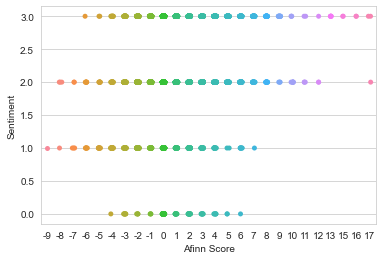

In [26]:
sns.stripplot(data = reviews,x = reviews['Afinn Score'],y = reviews['Sentiment'])
plt.show()

In [27]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

sentence  sentiment_value  \
0     the web designerûªs guide to ios (and android...                0   
1     rt @mention line for ipad 2 is longer today th...                4   
2     crazy that apple is opening a temporary store ...               -2   
3     the lesson from google one pass: in this digit...                1   
4     rt @mention at the panel: &quot;your mom has a...                0   
...                                                 ...              ...   
6359  thanks @mention for hosting this event #sxsw #...                2   
6360  sxsw iphone app is awesome, but ipad app crash...                2   
6361  rt @mention rt @mention download 20+ free trac...                1   
6362  oh at texas social media awards: 'you don't ne...                3   
6363  #google launching a &quot;major&quot; new soci...                0   

      word_count  
0             15  
1             23  
2             20  
3             22  
4             14  
...          ...  
6359          10  
6360          12  
6361          17  
6362          19  
6363          15  

[6364 rows x 3 columns]

In [28]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
2093  nice! rt @mention yes! gowalla wins best andoi...               16   
4427  good job y'all!  rt @mention yes! gowalla wins...               16   
2315  thanks to everyone who came by today. good luc...               17   
2029  wow rt @mention yes! gowalla wins best andoid ...               17   
2486  awesome! rt @mention yes! gowalla wins best an...               17   

      word_count  
2093          18  
4427          20  
2315          22  
2029          18  
2486          18

In [29]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
4690  google seems to have sabotaged my youtube acco...               -9   
1888  rt @mention ÷¼ no fear, no envy, no meanness,...               -8   
4322  afraid being at #sxsw would make you miss out ...               -8   
3071  we're so ungrateful bc we have too much shit t...               -8   
3408  just took a piss at the trade show, ipad in on...               -8   

      word_count  
4690          23  
1888          21  
4322          26  
3071          24  
3408          24

In [30]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    6364.000000
mean        0.879950
std         2.198905
min        -9.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        17.000000
Name: sentiment_value, dtype: float64

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

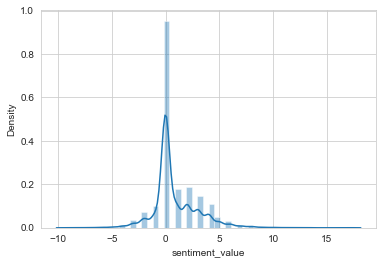

In [31]:
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

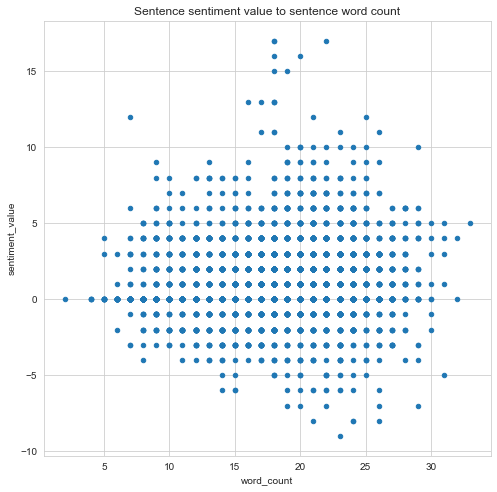

In [32]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')

In [33]:
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [34]:
for token in doc_block[:]:
    print(token, token.pos_)

# SYM
sxsw PROPN
i PRON
need VERB
the DET
best ADJ
android NOUN
dev NOUN
here ADV
. PUNCT
  SPACE
html5 PROPN
/ SYM
js PROPN
issue PROPN
need VERB
solving VERB
quickly ADV
. PUNCT
  SPACE
handsome ADJ
reward NOUN
and CCONJ
love NOUN
for ADP
grabs NOUN
. PUNCT
grab VERB
@mention PROPN
for ADP
# PRON
betainvites NOUN
# SYM
sxsw PROPN
! PUNCT
@mention PROPN
new ADJ
android PROPN
camera NOUN
, PUNCT
raises VERB
$ SYM
1.1 NUM
m NUM
from ADP
valley NOUN
players NOUN
bit.ly/ea1zgd X
/via PUNCT
@mention PROPN
this PRON
is AUX
a DET
# SYM
winning VERB
picture NOUN
# SYM
android ADJ
# NOUN
google PROPN
# SYM
sxsw PROPN
{ PUNCT
link PROPN
} PUNCT
i PRON
knew VERB
if SCONJ
i PRON
plied VERB
@mention PROPN
with ADP
beer NOUN
and CCONJ
stogies NOUN
last ADJ
night NOUN
i PRON
'd AUX
weasel VERB
my PRON
way NOUN
into ADP
the DET
team NOUN
android PROPN
party PROPN
tonight NOUN
. PUNCT
# PRON
success NOUN
# SYM
sxsw PROPN
. PUNCT
rt PROPN
@mention PROPN
partying VERB
with ADP
# SYM
android NOUN
and CCO

;) PUNCT
# SYM
sxsw PROPN
and CCONJ
i PRON
might AUX
check VERB
prices NOUN
for ADP
an DET
iphone NOUN
- PUNCT
crap NOUN
samsung PROPN
android PROPN
# PROPN
sxsw PROPN
is AUX
just ADV
starting VERB
, PUNCT
# PRON
ctia NOUN
is AUX
around ADP
the DET
corner NOUN
and CCONJ
# SYM
googleio PROPN
is AUX
only ADV
a DET
hop NOUN
skip NOUN
and CCONJ
a DET
jump NOUN
from ADP
there ADV
, PUNCT
good ADJ
time NOUN
to PART
be AUX
an DET
# SYM
android PROPN
fan NOUN
farooqui NOUN
: PUNCT
now ADV
about ADV
mobile NOUN
. PUNCT
ios NOUN
, PUNCT
with ADP
android PROPN
catching VERB
up ADP
fast ADV
and CCONJ
will AUX
grow VERB
more ADV
once SCONJ
they PRON
allow VERB
in ADP
- PUNCT
app NOUN
purchasing NOUN
. PUNCT
# SYM
gamesfortv ADJ
# SYM
sxsw PROPN
sxsw PROPN
: PUNCT
foursquare NOUN
updates VERB
its PRON
merchant NOUN
platform NOUN
with ADP
new ADJ
ûïspecialsû NOUN
{ PUNCT
link VERB
} PUNCT
# SYM
android NOUN
# SYM
flashspecial ADJ
# SYM
free ADJ
# SYM
iphone NOUN
# SPACE
sxsw PROPN
@mention PROPN
w

In [35]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

nouns_verbs

['need',
 'android',
 'dev',
 'need',
 'solving',
 'reward',
 'love',
 'grabs',
 'grab',
 'betainvites',
 'camera',
 'raises',
 'valley',
 'players',
 'winning',
 'picture',
 '#',
 'knew',
 'plied',
 'beer',
 'stogies',
 'night',
 'weasel',
 'way',
 'team',
 'tonight',
 'success',
 'partying',
 'android',
 'lustre',
 'pearl',
 'link',
 'win',
 'xperia',
 'play',
 'android',
 'phone',
 'details',
 'link',
 'minutes',
 'beer',
 'maudies',
 'giving',
 'person',
 'comes',
 'tells',
 'android',
 'look',
 'look',
 'check',
 'team',
 'choice',
 'awards',
 'finalists',
 'announced',
 'team',
 'rock',
 'need',
 'play',
 'game',
 'android',
 'link',
 '@mention',
 'congratulations',
 'winning',
 'award',
 'tell',
 'wonders',
 'today',
 'see',
 'iphones',
 'at&amp;t',
 'wifi',
 'frozen',
 'tmobile',
 'teathering',
 'works',
 'charm',
 'auntie',
 'voxpop',
 'apps',
 'watch',
 'link',
 'phones',
 'view',
 'looks',
 'laptop',
 'dock',
 'phone',
 'link',
 'heading',
 'hosting',
 'dev',
 'meetup',
 'de

In [36]:
adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
adj1

'best handsome new android last free free next cool hard excited awesome android popular worth many android android awesome android new great big buggy excited ready full native neat free teamandroid next next good awesome new new smart good gamesfortv new flashspecial free easier little live final special least cool jealous continuous preferred fine nice new more big'

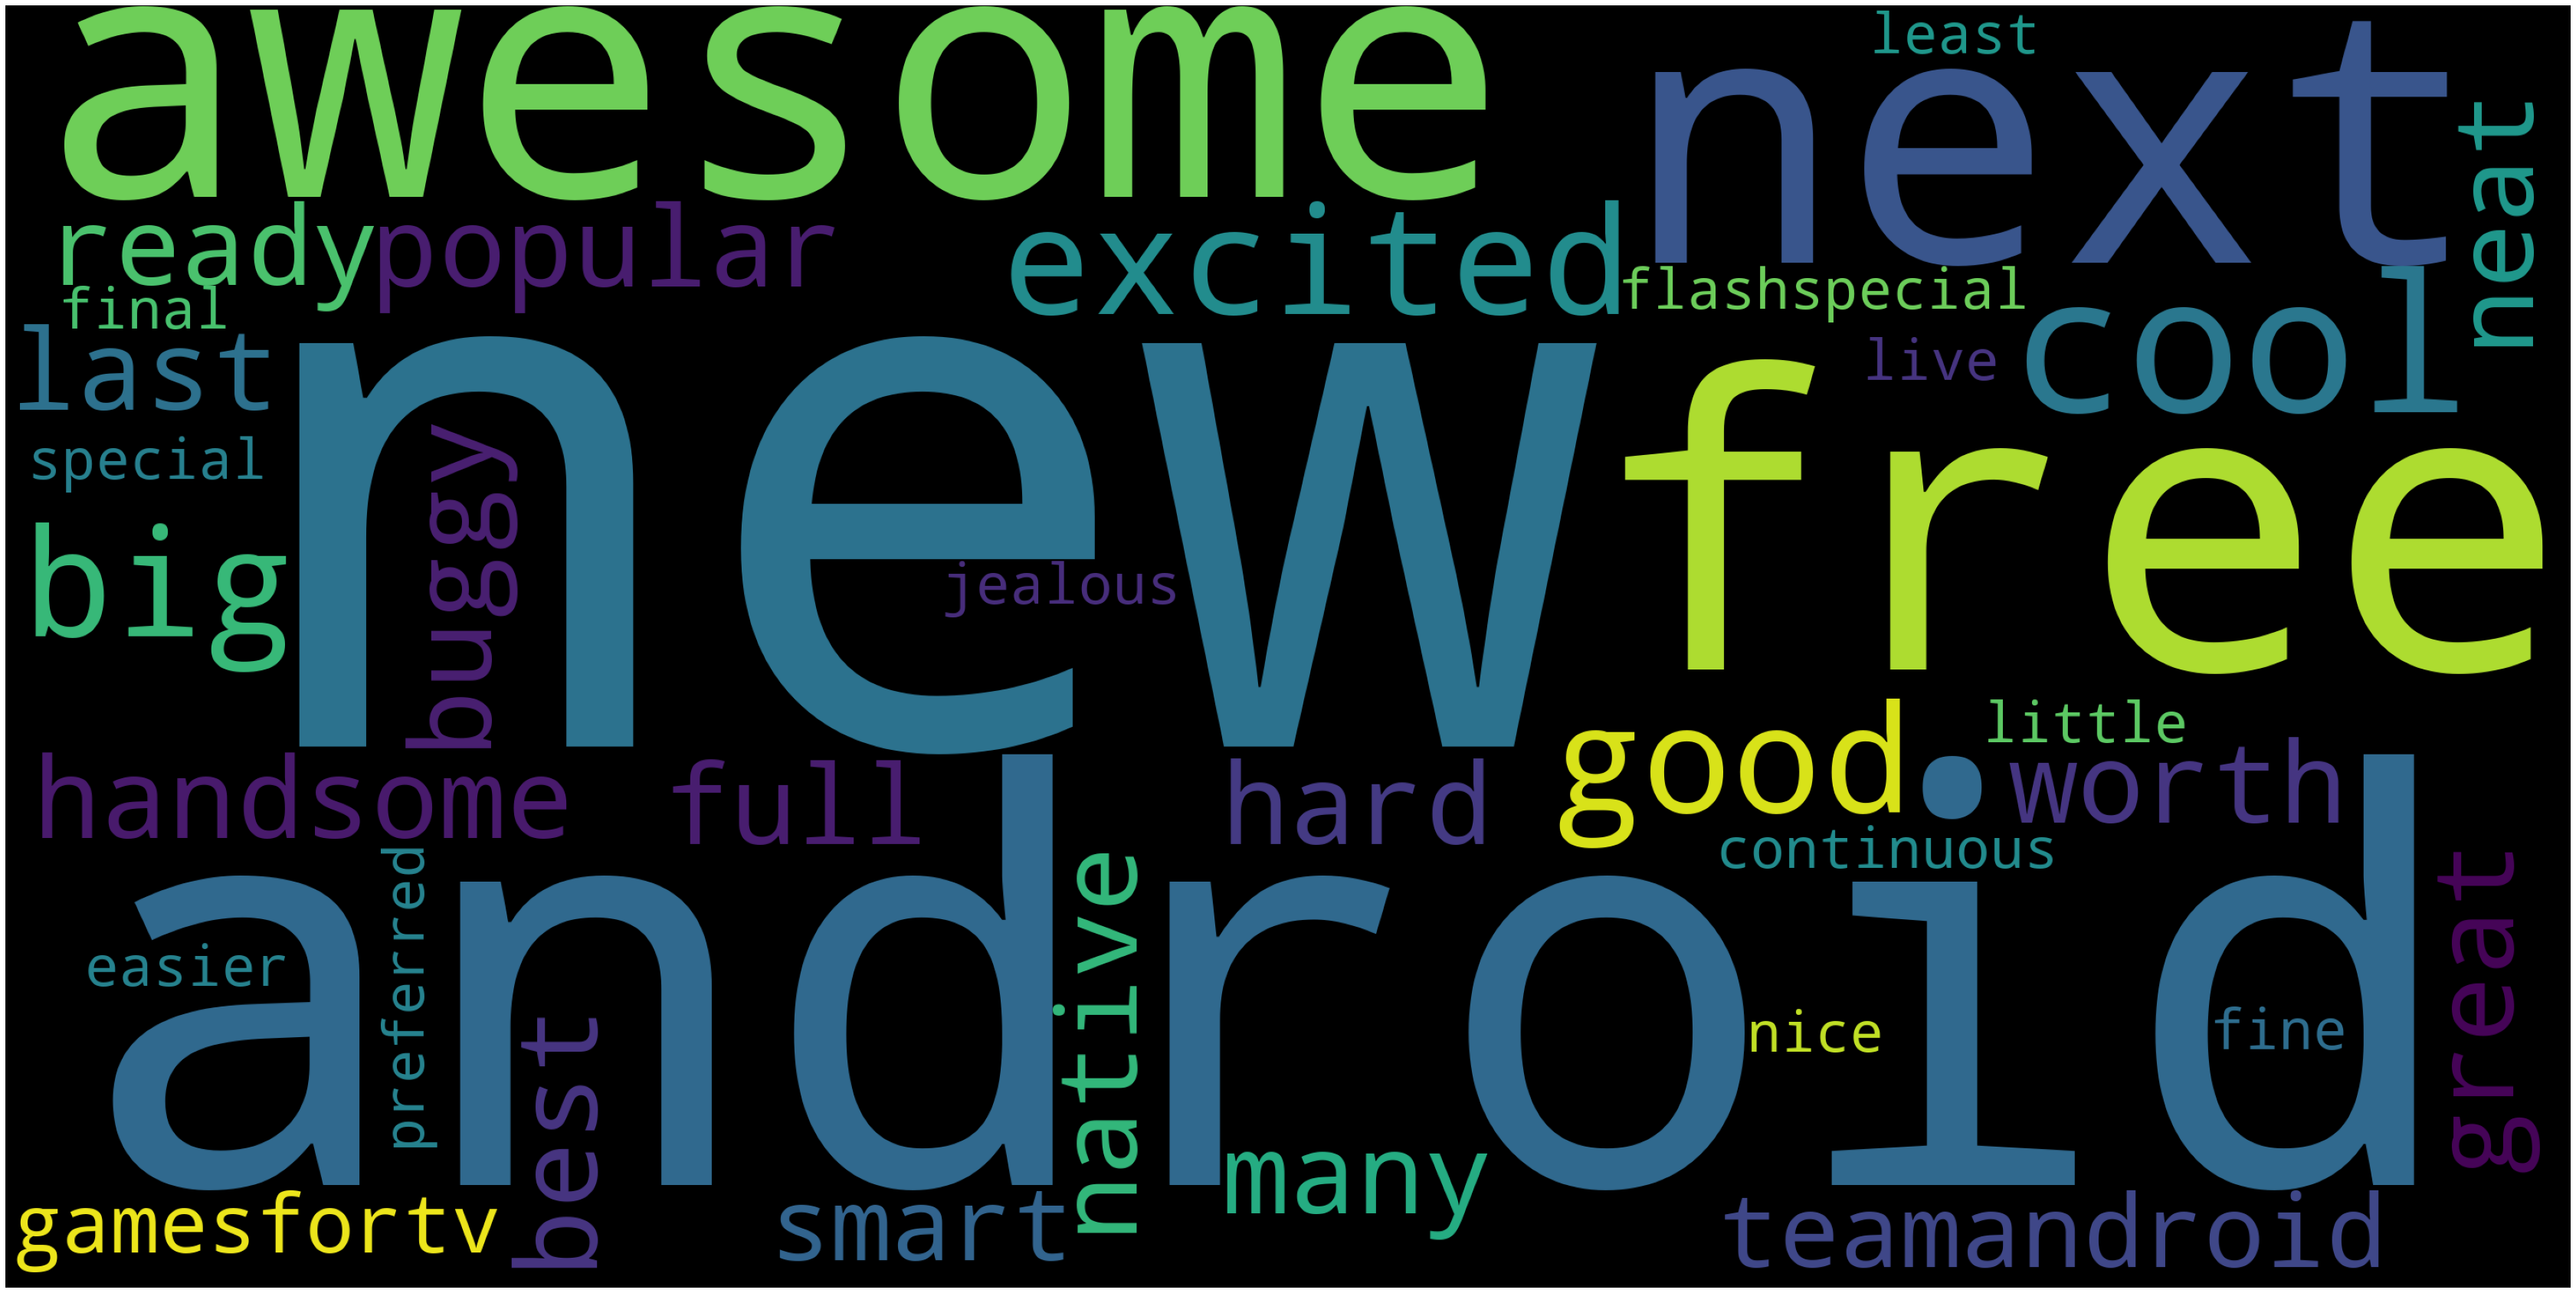

In [37]:
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

# SYM
sxsw PROPN
i PRON
need VERB
the DET
best ADJ
android NOUN
dev NOUN
here ADV
. PUNCT
  SPACE
html5 PROPN
/ SYM
js PROPN
issue PROPN
need VERB
solving VERB
quickly ADV
. PUNCT
  SPACE
handsome ADJ
reward NOUN
and CCONJ
love NOUN
for ADP
grabs NOUN
. PUNCT
grab VERB
@mention PROPN
for ADP
# PRON
betainvites NOUN
# SYM
sxsw PROPN
! PUNCT
@mention PROPN
new ADJ
android PROPN
camera NOUN
, PUNCT
raises VERB
$ SYM
1.1 NUM
m NUM
from ADP
valley NOUN
players NOUN
bit.ly/ea1zgd X
/via PUNCT
@mention PROPN
this PRON
is AUX
a DET
# SYM
winning VERB
picture NOUN
# SYM
android ADJ
# NOUN
google PROPN
# SYM
sxsw PROPN
{ PUNCT
link PROPN
} PUNCT
i PRON
knew VERB
if SCONJ
i PRON
plied VERB
@mention PROPN
with ADP
beer NOUN
and CCONJ
stogies NOUN
last ADJ
night NOUN
i PRON
'd AUX
weasel VERB
my PRON
way NOUN
into ADP
the DET
team NOUN
android PROPN
party PROPN
tonight NOUN
. PUNCT
# PRON
success NOUN
# SYM
sxsw PROPN
. PUNCT
rt PROPN
@mention PROPN
partying VERB
with ADP
# SYM
android NOUN
and CCO

pit NOUN
but CCONJ
replaced VERB
it PRON
with ADP
a DET
recharging NOUN
station NOUN
;) PUNCT
# SYM
sxsw PROPN
and CCONJ
i PRON
might AUX
check VERB
prices NOUN
for ADP
an DET
iphone NOUN
- PUNCT
crap NOUN
samsung PROPN
android PROPN
# PROPN
sxsw PROPN
is AUX
just ADV
starting VERB
, PUNCT
# PRON
ctia NOUN
is AUX
around ADP
the DET
corner NOUN
and CCONJ
# SYM
googleio PROPN
is AUX
only ADV
a DET
hop NOUN
skip NOUN
and CCONJ
a DET
jump NOUN
from ADP
there ADV
, PUNCT
good ADJ
time NOUN
to PART
be AUX
an DET
# SYM
android PROPN
fan NOUN
farooqui NOUN
: PUNCT
now ADV
about ADV
mobile NOUN
. PUNCT
ios NOUN
, PUNCT
with ADP
android PROPN
catching VERB
up ADP
fast ADV
and CCONJ
will AUX
grow VERB
more ADV
once SCONJ
they PRON
allow VERB
in ADP
- PUNCT
app NOUN
purchasing NOUN
. PUNCT
# SYM
gamesfortv ADJ
# SYM
sxsw PROPN
sxsw PROPN
: PUNCT
foursquare NOUN
updates VERB
its PRON
merchant NOUN
platform NOUN
with ADP
new ADJ
ûïspecialsû NOUN
{ PUNCT
link VERB
} PUNCT
# SYM
android NOUN
# SYM


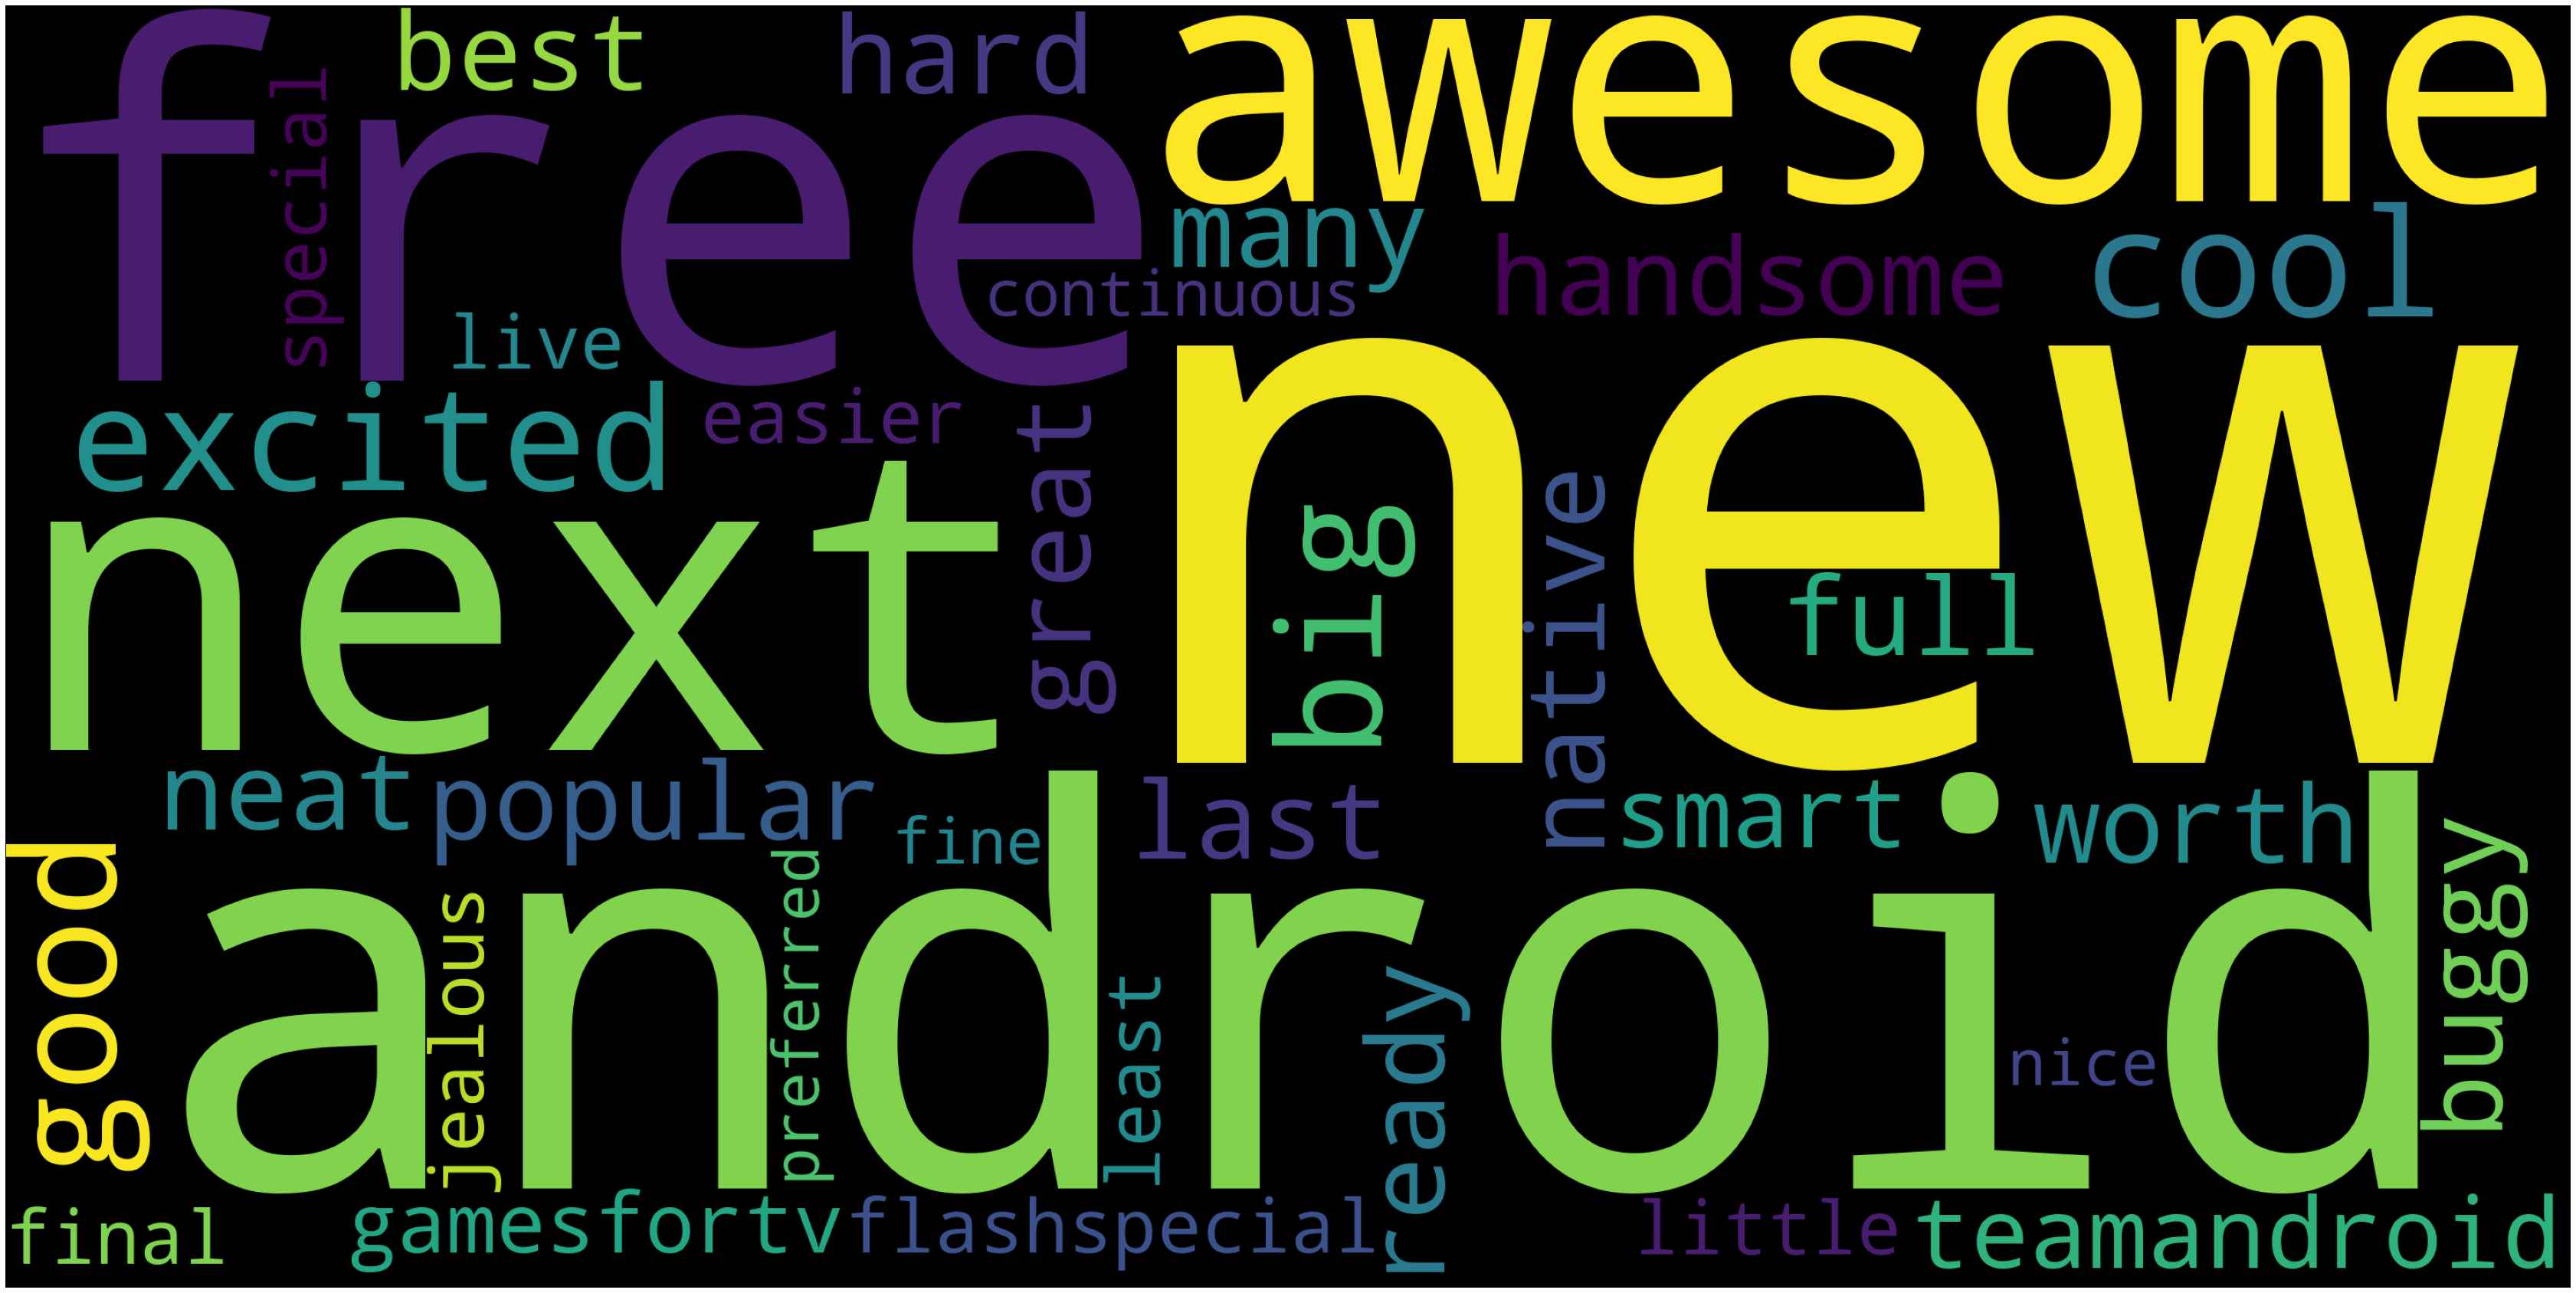

In [38]:
temp = [y.strip() for y in df0.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df1.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df2.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df3.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df4.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df5.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df6.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df7.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df8.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [ ]:
temp = [y.strip() for y in df9.Product_Description]
temp = [x for x in temp if x]
text = ' '.join(temp)
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)
for token in doc_block[:]:
    print(token, token.pos_)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

adj = [token.text for token in doc_block if token.pos_ in ('ADJ')]
adj1 = ' '.join([str(elem) for elem in adj])
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='black').generate(adj1)
# Plot
plot_cloud(wordcloud)

In [39]:
import nltk
nltk.download('punkt')

#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
text_tokens

#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(["mention","sxsw","SXSW","RT","link","Austin","amp","via","be","4","sxswi","w","re","if","3","5","a","u","SxSW","s","re","m","SXSWi","\x89ÛÏmention","pm","fb","ll","sxsw\x89Û\x9d","2","qagb","Sxsw","\x89ûïmention","I"])

reviews = [word for word in text_tokens if not word in stop_words]
reviews

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['need',
 'best',
 'android',
 'dev',
 'html5js',
 'issue',
 'need',
 'solving',
 'quickly',
 'handsome',
 'reward',
 'love',
 'grabs',
 'grab',
 'betainvites',
 'new',
 'android',
 'camera',
 'raises',
 '11m',
 'valley',
 'players',
 'bitlyea1zgd',
 'winning',
 'picture',
 'android',
 'google',
 'knew',
 'plied',
 'beer',
 'stogies',
 'last',
 'night',
 'id',
 'weasel',
 'way',
 'team',
 'android',
 'party',
 'tonight',
 'success',
 'rt',
 'partying',
 'android',
 'lustre',
 'pearl',
 'rt',
 'win',
 'sony',
 'xperia',
 'play',
 'android',
 'phone',
 'tuesday',
 '315',
 'details',
 'rt',
 '40',
 'minutes',
 'til',
 'party',
 'free',
 'beer',
 'free',
 'maudies',
 'tacos',
 'free',
 'ipad',
 'android',
 'tablet',
 'kindle',
 'giveaway',
 'bitlyajs2011',
 'im',
 'giving',
 '100',
 'next',
 'person',
 'comes',
 'tells',
 'cool',
 'android',
 'look',
 'around',
 'look',
 'hard',
 'rt',
 'check',
 'lightboxcom',
 'team',
 'android',
 'choice',
 'awards',
 'finalists',
 'announced',
 'team',

In [40]:
data = pd.read_csv("Product_details.csv")
data.describe()

Text_ID  Product_Type    Sentiment
count  6364.000000   6364.000000  6364.000000
mean   4568.862822      7.462445     2.230673
std    2621.198346      2.440492     0.638413
min       1.000000      0.000000     0.000000
25%    2297.750000      6.000000     2.000000
50%    4587.500000      9.000000     2.000000
75%    6827.500000      9.000000     3.000000
max    9092.000000      9.000000     3.000000

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [42]:
data["Product_Type"].unique()

array([9, 6, 7, 2, 8, 3, 0, 5, 1, 4], dtype=int64)

In [43]:
data["Sentiment"].unique()

array([2, 1, 3, 0], dtype=int64)

In [44]:
Sentiment_unique = len(data["Sentiment"].unique())
print("Number of Unique Sentiment: " + str(Sentiment_unique))

Number of Unique Sentiment: 4


## Visualizing the distributions of numerical variables:

In [45]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

# Split into Train/Test

- Before we explore the dataset we're going to split it into training set and test sets
- Our goal is to eventually train a sentiment analysis classifier
- Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don't train the classifier on imbalanced data
- To use sklearn's `Stratified ShuffleSplit` class, we're going to remove all samples that have NAN in review score, then covert all review scores to `integer` datatype

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["Sentiment"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["Sentiment"] = dataAfter["Sentiment"].astype(int)

Before 6364
After 6364


In [47]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["Sentiment"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

### Check to see if train/test sets were stratified proportionately in comparison to raw data.

In [48]:
len(strat_train)

5091

In [49]:
strat_train["Sentiment"].value_counts()/len(strat_train) # value_count() counts all the values based on column

2    0.591632
3    0.328226
1    0.062660
0    0.017482
Name: Sentiment, dtype: float64

In [50]:
len(strat_test)

1273

In [51]:
strat_test["Sentiment"].value_counts()/len(strat_test)

2    0.591516
3    0.328358
1    0.062844
0    0.017282
Name: Sentiment, dtype: float64

##  Data Exploration (Training Set)

In [52]:
reviews = strat_train.copy()
reviews.head(5)

Text_ID                                Product_Description  \
1345     3188  @mention for the life of me, I can't get my iP...   
5312     8140  #seenatsxsw2011 Best thing seen at #sxsw so fa...   
112      2439  that would be me (via @mention Apple's opened ...   
4821     6674  RT @mention Someone at #SXSW needs to host a r...   
5954     8141  @mention Sweet 8-bit pic. Are you an artist? w...   

      Product_Type  Sentiment  
1345             6          1  
5312             9          2  
112              9          2  
4821             9          3  
5954             9          2

In [53]:
len(reviews["Product_Description"].unique()), len(reviews["Product_Type"].unique())

(5084, 10)

In [54]:
reviews.groupby("Product_Description")["Product_Type"].unique()

Product_Description
!!! RT @mention Got a craving? #SXSW minds created an app for that - Foodspotting {link} #iPhone #apps                                                                                [9]
#120 in line at temp 5000 sq. ft #Apple store for new #iPAD in Austin #SXSW                                                                                                           [9]
#AAPL already the big winner at #sxsw {link} #in                                                                                                                                      [9]
#ACLU Approved? WT? RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                                                 [9]
#Android App Review: #SXSW Go. | {link} pls ª¼                                                                                                                                       [9]
                                                  

In [55]:
# Lets see all the different text_id's for same product type 
different_names = reviews[reviews["Product_Type"] == 0]["Product_Description"].unique()
for i in different_names:
    print(i)

they took away the lego pit but replaced it with a recharging station ;) #sxsw and i might check prices for an iphone - crap samsung android
I still use Tweetie for Mac &amp; I'm running Leopard. I'll be a pariah at #SXSW! I wish I at least had an Android! SOMETHING TO MAKE ME COOL.
Is it just me or has the @mention client for Android gotten really buggy lately? #SXSW to blame?
Wish I was at #SXSW meeting with everyone in #TeamAndroid and the rest of the Android community. I will be there next year.
RT @mention Check out Lightbox.com at the Team Android Choice Awards finalists announced at #sxsw @mention and team rock!
I knew if I plied @mention with beer and stogies last night I'd weasel my way into the Team Android party tonight. #success #SXSW.
the @mention booth is up and ready for the #sxsw tradeshow tmr! Off to the Android party...
@mention launching Gowalla 3 for Droid at #SxSW - should push 4square and Groupon {link}
SXSW: Foursquare updates its merchant platform with new ÛÏSp

In [56]:
reviews[reviews["Product_Type"] == 1]["Product_Description"].value_counts()

@mention Just started using the Android app. Totally killer service and I think you'll be huge at #SXSW! Hope your servers are ready. ;)                   1
Congrats! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw                                               1
I was really hoping #SXSW would bring an Android version of @mention Oh well, maybe someday...a long time from now.                                        1
Cobra iRadar detection system coming to Android next month {link} #Android #GPS #iPhone #SXSW                                                              1
RT @mention Check out this new #android app #bizzy, we're using it to check out #sxsw {link}                                                               1
RT @mention #SXSW Go 1.1 for Android is LIVE in the Android Marketplace! New features, including SD card storage and more.  {link} via @mention            1
#sxsw adding my schedule into the android sxsw go app.  Ha

### Confirmed our hypothesis that each product_id can have multiple Text_ID . Therefore we should only really concern ourselves with which product_id's do well, not the Text_ID's.

In [57]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["Product_Type"].value_counts().plot(kind="bar", ax=ax1, title="Product_Type Frequency")
np.log10(reviews["Product_Type"].value_counts()).plot(kind="bar", ax=ax2, title="Product_Type Frequency (Log10 Adjusted)") 
plt.show()

- Based on the bar graph for Product_type, we see that certain products have significantly more reviews than other products.
- We also took the log of the Product_type to normalize the data, in order display an in-depth picture of each Product_type, and we see that the distribution still follows a "right tailed" distribution

In [58]:
# Entire training dataset average rating
reviews["Sentiment"].mean()

2.230603024945983

## Sentiment /Product_type 

In [59]:
Product_type_count_ix = reviews["Product_Type"].value_counts().index
plt.subplots(2,1,figsize=(16,8))
plt.subplot(2,1,1)
reviews["Product_Type"].value_counts().plot(kind="bar", title="Product_Type Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="Product_Type", y="Sentiment", order=Product_type_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

- The most frequently sentiment product_type have their average sentiments in the 2-3 range, with little variance
- Although there is a slight inverse relationship between the product_type frequency level and average sentiment for the 8th product_type.
**<u>Note</u> that point-plot graph automatically takes the average of the sentiment data.**

# Correlations

In [60]:
# Here we can analyze reviews.ratings with asins
corr_matrix = reviews.corr()
corr_matrix

Text_ID  Product_Type  Sentiment
Text_ID       1.000000      0.024361   0.003081
Product_Type  0.024361      1.000000  -0.436209
Sentiment     0.003081     -0.436209   1.000000

In [61]:
counts = reviews["Product_Type"].value_counts().to_frame()
counts.head()

Product_Type
9          3257
6           535
2           369
7           260
3           249

In [62]:
avg_rating = reviews.groupby("Product_Type")["Sentiment"].mean().to_frame()
avg_rating.head()

Sentiment
Product_Type           
0              2.794872
1              2.777778
2              2.663957
3              2.598394
4              3.000000

In [63]:
table = counts.join(avg_rating)
table.head(10)

Product_Type  Sentiment
9          3257   1.992324
6           535   2.734579
2           369   2.663957
7           260   2.726923
3           249   2.598394
8           166   2.253012
5           165   2.648485
0            39   2.794872
1            36   2.777778
4            15   3.000000

In [64]:
plt.scatter("Product_Type", "Sentiment", data=table)
table.corr()

Product_Type  Sentiment
Product_Type       1.00000   -0.77422
Sentiment         -0.77422    1.00000

From our analysis in data exploration above between Product_type and sentiment, we discovered that there are many Product_type with low occurrence that have high variances, as a result we concluded that theses low occurrence Product_types are not significant in our analysis given the low sample size.
<br>
<br>
Similarly in our correlation analysis between Product_type and sentiments, we see that there is almost negative correlation which is consistent with our findings.

# Sentiment Analysis

Using the features in place, we will build a classifier that can determine a Product_description sentiment.

## Set Target Variable (Sentiments)

Segregate ratings from 0-3 into positive, neutral, and negative.

In [65]:
def sentiments(Sentiment):
    if (Sentiment == 2) or (Sentiment == 3):
        return "Positive"
    elif (Sentiment == 0):
        return "Neutral"
    elif (Sentiment == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["Sentiment"].apply(sentiments)
strat_test["Sentiment"] = strat_test["Sentiment"].apply(sentiments)
strat_train["Sentiment"][:20]

1345    Negative
5312    Positive
112     Positive
4821    Positive
5954    Positive
228     Positive
3329     Neutral
2096    Positive
202     Positive
4518    Positive
901     Positive
2170     Neutral
3169    Positive
2835    Positive
4204    Positive
4977    Positive
1088    Positive
2206    Positive
3630    Positive
3684    Negative
Name: Sentiment, dtype: object

In [66]:
# Prepare data
X_train = strat_train["Product_Description"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["Product_Description"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

5091 1273


5091  training samples and 1273 testing samples.

## Extract Features

Here we will turn content into numerical feature vectors using the **Bag of Words** strategy:
- Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)
- X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)
<br>
<br>

In order to implement the **Bag of Words** strategy, we will use SciKit-Learn's **CountVectorizer** to performs the following:
- Text preprocessing:
    - Tokenization (breaking sentences into words)
    - Stopwords (filtering "the", "are", etc)
- Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
- Feature Vector (converts the dictionary of text documents into a feature vector)

In [67]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')


# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(5091, 7437)

Here we have 5091 training samples and 7408 distinct words in our training sample.


Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use **TfidfTransformer** to reduce this redundancy:
- Term Frequencies (**Tf**) divides number of occurrences for each word by total number of words
- Term Frequencies times Inverse Document Frequency (**Tfidf**) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc)

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5091, 7437)

## Building a Pipeline from the Extracted Features


We will use **Multinominal Naive Bayes** as our Classifier
- Multinominal Niave Bayes is most suitable for word counts where data are typically represented as **word vector counts** (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i
- Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

## Test Model

In [70]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9198743126472899

Here we see that our Multinominal Naive Bayes Classifier has a 91.98% accuracy level based on the features. 
<br>
<br>
Next we will conduct the following:
- Test other models
- Fine tune the best models to avoid over-fitting

## Testing Other Models


**Logistic Regression Classifier**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9222309505106049

**Support Vector Machine Classifier**

In [72]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9175176747839748

**Decision Tree Classifier**

In [73]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8821681068342498

**Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9198743126472899

Looks like all the models performed very well (>85%), and we will use the **Support Vector Machine Classifier** since it has the highest accuracy level at **92.30%**.
<br>
Now we will fine tune the Support Vector Machine model (Linear_SVC) to avoid any potential over-fitting.

## Fine tuning the Support Vector Machine Classifier

- Here we will run a **Grid Search** of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer)
- We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization
- Then we will fit the grid search to our training data set
- Next we will use our final classifier (after fine-tuning) to test some arbitrary reviews
- Finally we will test the accuracy of our final classifier (after fine-tuning)

Note that **Support Vector Machines** is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

In [75]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
#new_text = ["The tablet is good, really liked it.", # positive
         #   "The tablet is ok, but it works fine.", # neutral
          #  "The tablet is not good, does not work very well."] # negative

#X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(new_text)]

In [76]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9222309505106049

**Results:**
- After testing some arbitrary reviews, it seems that our features is performing correctly with Positive, Neutral, Negative results
- We also see that after running the grid search, our Support Vector Machine Classifier has improved to **92.77%** accuracy level

## Detailed Performance Analysis of Support Vector Machine Classifier

For detailed analysis, we will:
- Analyze the best mean score of the grid search (classifier, parameters, CPU core)
- Analyze the best estimator
- Analyze the best parameter

In [77]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9237869477954233
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


- Here we see that the best mean score of the grid search is 92.41% which is very close to our accuracy level of 92.77%
- Our best estimator here is also displayed
- Lastly, our best parameters are true for use_idf in tfidf, and ngram_range between 1,2

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

    Negative       0.61      0.17      0.27        80
     Neutral       0.20      0.05      0.07        22
    Positive       0.93      0.99      0.96      1171

    accuracy                           0.92      1273
   macro avg       0.58      0.40      0.44      1273
weighted avg       0.90      0.92      0.90      1273

Accuracy: 0.9222309505106049


Below is the summary of the classification report:
- Precision: determines how many objects selected were correct
- Recall: tells you how many of the objects that should have been selected were actually selected
- F1 score measures the weights of recall and precision (1 means precision and recall are equally important, 0 otherwise)
- Support is the number of occurrences of each class

The results in this analysis confirms our previous data exploration analysis, where the data are very skewed to the positive reviews as shown by the lower support counts in the classification report. Also, both neutral and negative reviews has large standard deviation with small frequencies, which we would not consider significant as shown by the lower precision, recall and F1 scores in the classification report.

However, despite that Neutral and Negative results are not very strong predictors in this data set, it still shows a 92.77% accuracy level in predicting the sentiment analysis, which we tested and worked very well when inputting arbitrary text (new_text). Therefore, we are comfortable here with the skewed data set. Also, as we continue to input new dataset in the future that is more balanced, this model will then re-adjust to a more balanced classifier which will increase the accuracy level.

<u>Note</u>: The first row will be ignored as we previously replaced all NAN with " ". We tried to remove this row when we first imported the raw data, but Pandas `DataFrame` did not like this row removed when we tried to drop all NAN (before stratifying and splitting the dataset). As a result, replacing the NAN with " " was the best workaround and the first row will be ignored in this analysis.

Finally, the overall result here explains that the product_description in this dataset are generally positive.

In [79]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

array([[  14,    0,   66],
       [   1,    1,   20],
       [   8,    4, 1159]], dtype=int64)

<u>Note</u>: 
By considering only row 1-3 and column 1-3 labeled as negative, neutral and positive, we see that positive sentiment can sometimes be confused for one another with neutral and negative ratings, with scores of 21 and 65 respectively. However, based on the overall number of significant positive sentiment at a score 1166, then confusion score of 21 and 65 for neutral and negative ratings respectively are considered insignificant.

Also, this is a result of positively skewed dataset, which is consistent with both our data exploration and sentiment analysis. Therefore, we conclude that the product type in this dataset has generally positive sentiment.